This notebook plots a qubit and the control

In [57]:
%config InlineBackend.figure_format = "retina"
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["savefig.dpi"] = 100
rcParams["figure.figsize"] = [10, 10]
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 14

import numpy as np
import jax.numpy as jnp
import jax

In [58]:
noise_level = []
cost_mean = []
cost_std = []
fidelity_mean = []
fidelity_std = []

with open('/Users/vincentduong/dev/boucle/data/noisy_control1.txt', 'r') as f:
    for line in f.readlines():
        l = line.strip().split('=')
        
        if l[0].strip() == 'Noise Level':
            noise_level.append(float(l[1].strip()))

        elif l[0].strip() == 'Cost':
            x = l[1].split(',')
            cost_mean.append(float(x[0].strip()))
            cost_std.append(float(x[1].strip()))

        elif l[0].strip() == 'Fidelity':
            x = l[1].split(',')
            fidelity_mean.append(float(x[0].strip()))
            fidelity_std.append(float(x[1].strip()))




<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/var/folders/ty/4zwb2bns1rgcb0bnvt8w8nt80000gn/T/ipykernel_78826/2223196360.py:11: SyntaxWarning: invalid escape sequence '\s'
  ax2.set_xlabel('noise level $\sigma$')


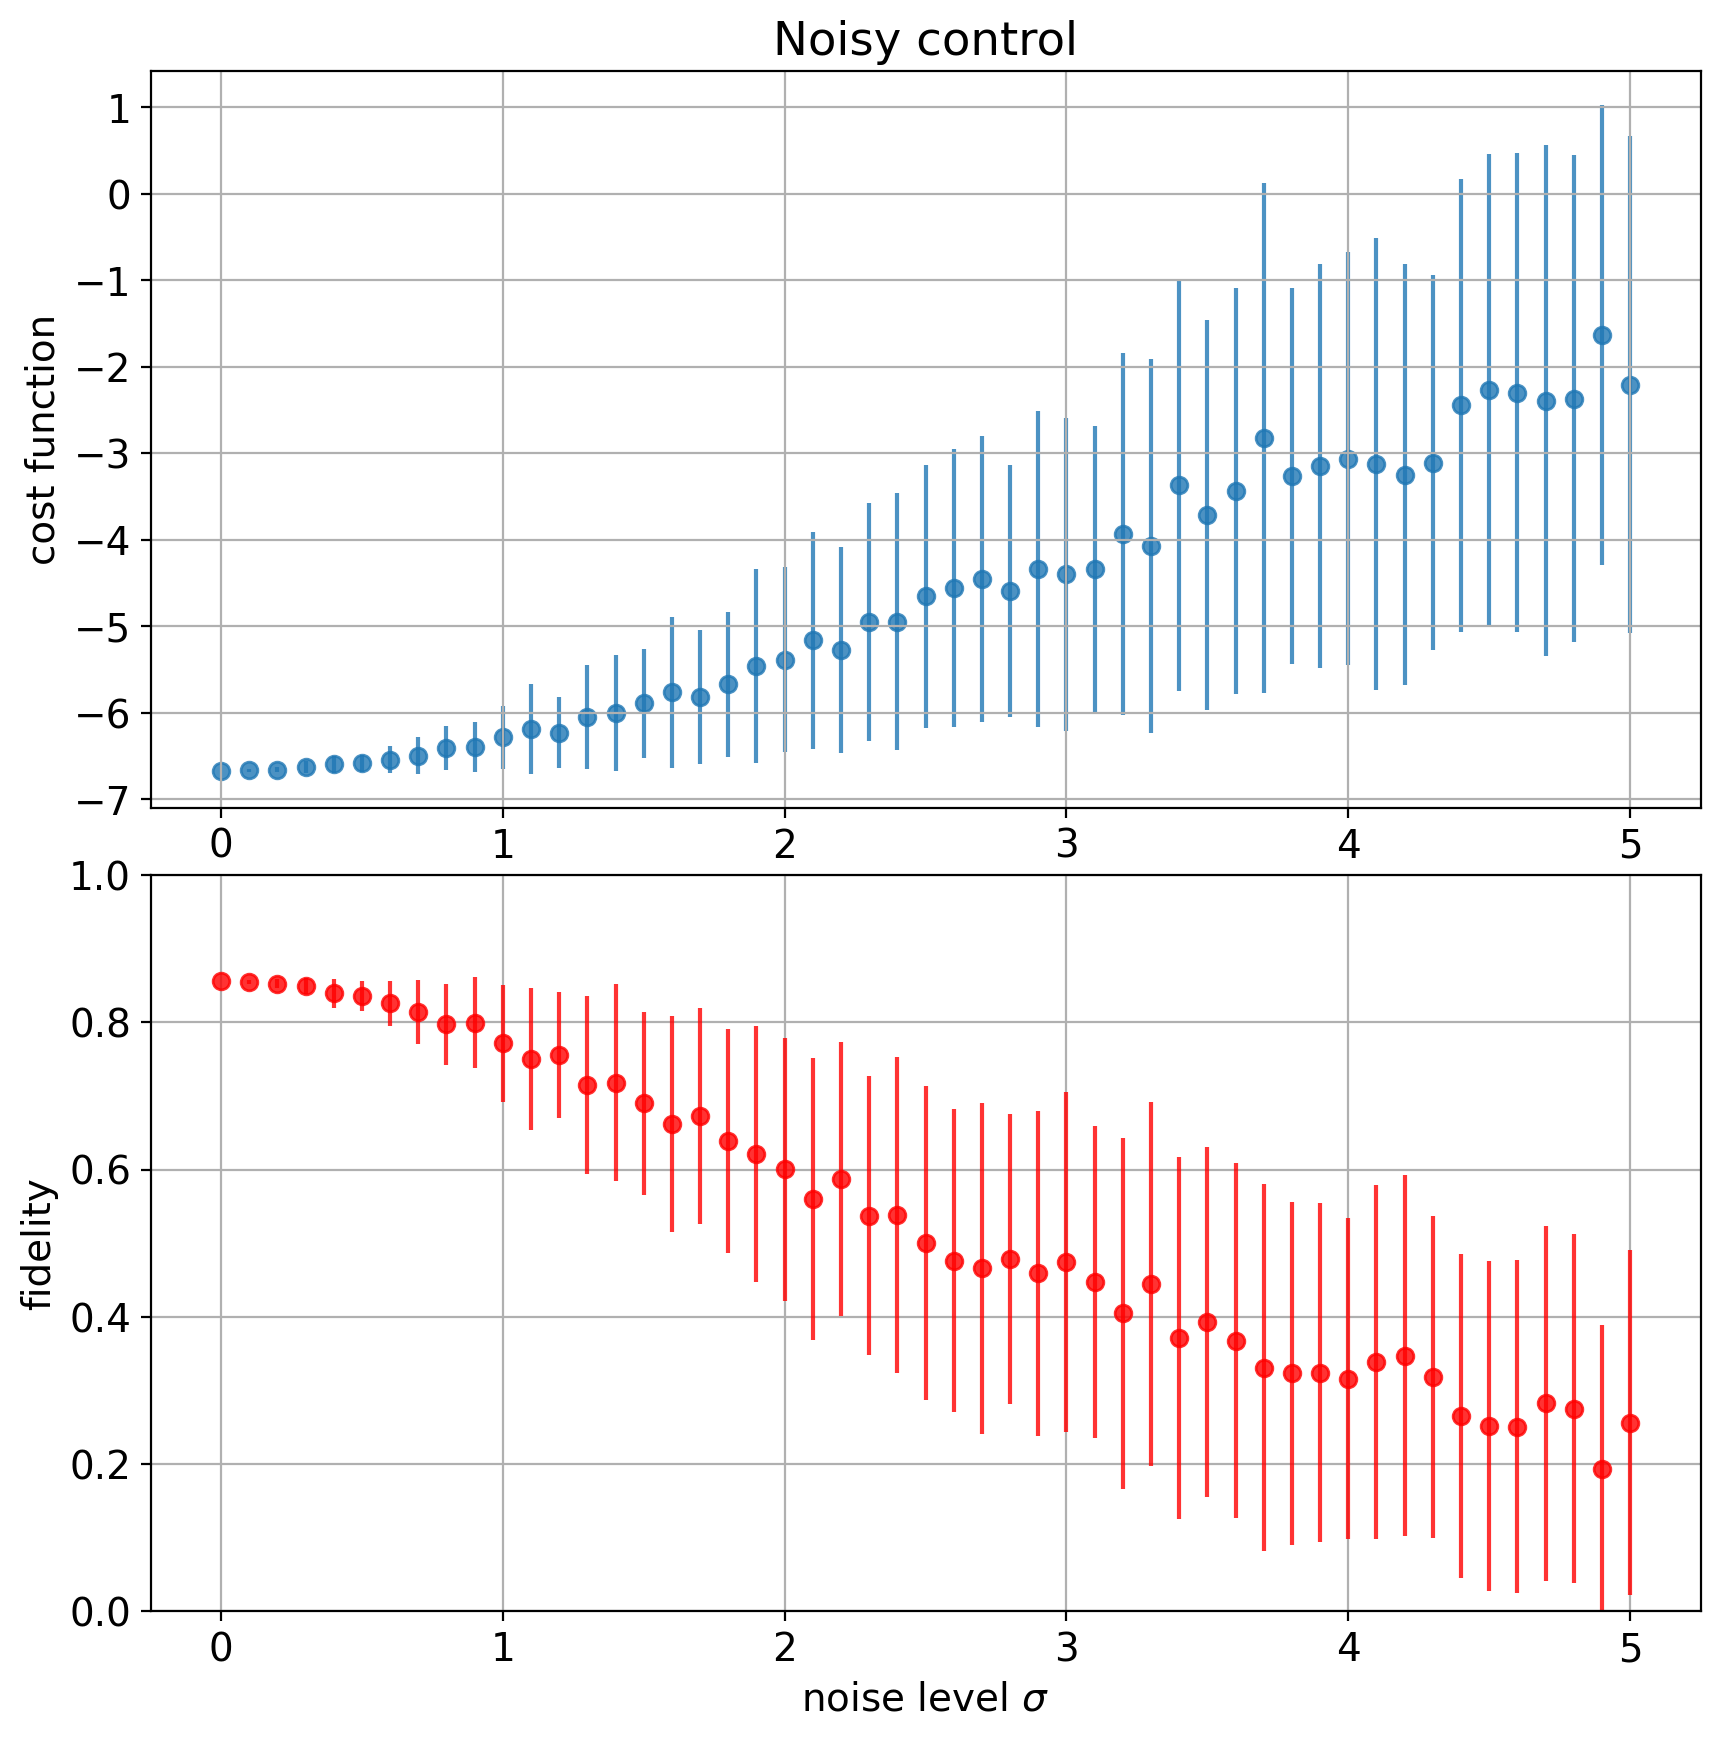

<Figure size 1200x1200 with 0 Axes>

In [59]:
ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=2, colspan=1)
plt.title('Noisy control')
plt.grid()
ax1.errorbar(noise_level, cost_mean, cost_std, alpha=0.8, label='cost', zorder=1, fmt='o')
ax1.set_ylabel('cost function')

ax2 = plt.subplot2grid((4, 1), (2, 0), rowspan=2, colspan=1)
plt.errorbar(noise_level, fidelity_mean, fidelity_std, alpha=0.8, label='fidelity', color='r', fmt='o')
plt.ylim(0,1)
plt.grid()
ax2.set_xlabel('noise level $\sigma$')
ax2.set_ylabel('fidelity')

plt.figure(figsize=(12, 12))

plt.show(ax1, ax2)



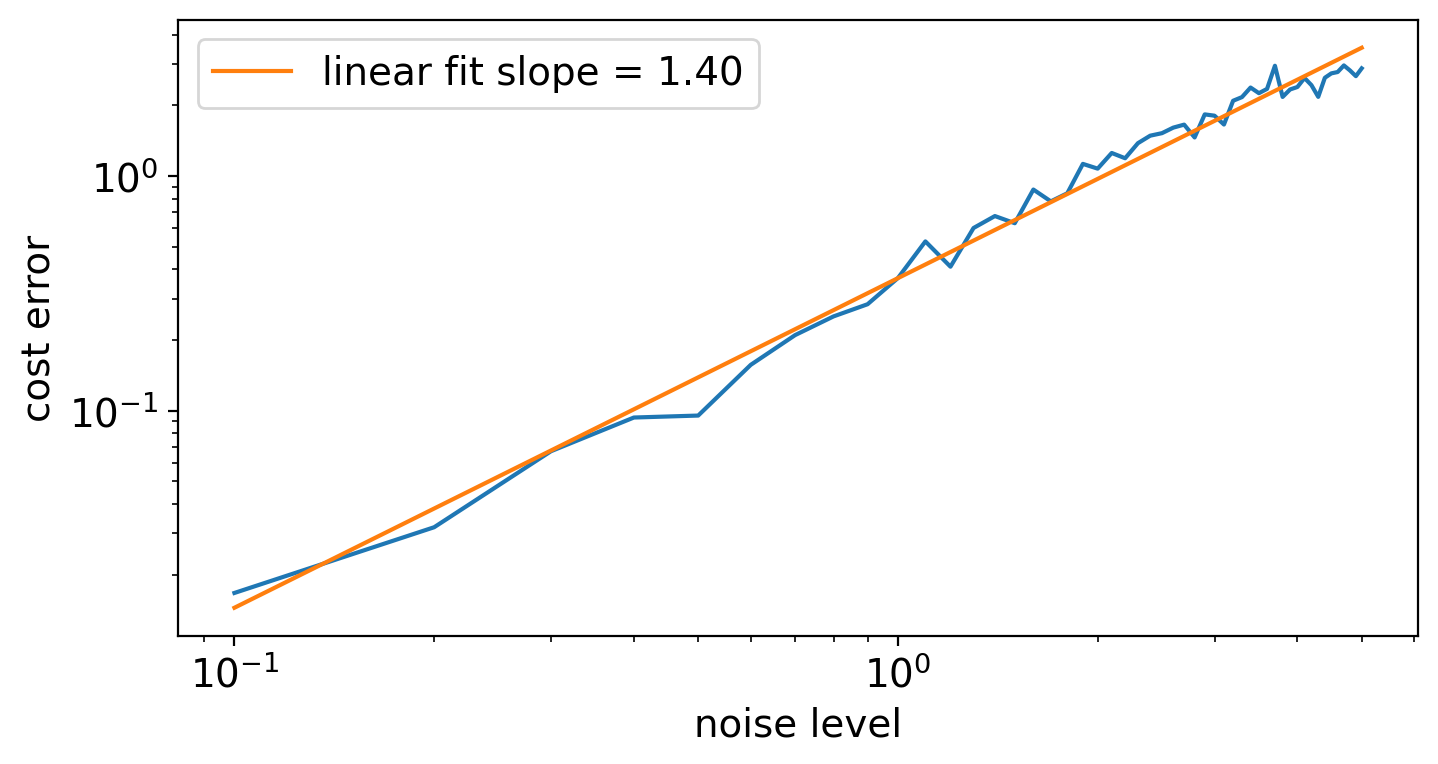

In [60]:
import numpy as np
from sklearn.linear_model import LinearRegression

xdata, ydata = np.array([np.log(noise_level[1:])]).T, np.array(np.log(cost_std[1:]))
reg = LinearRegression().fit(xdata, ydata)

plt.figure(figsize=(8, 4))
plt.loglog(noise_level[1:], cost_std[1:])
plt.loglog(noise_level[1:], np.exp(reg.intercept_) * np.power(noise_level[1:], reg.coef_[0]),
           label='linear fit slope = {:.2f}'.format(reg.coef_[0]))
plt.legend()
plt.xlabel('noise level')
plt.ylabel('cost error')
plt.show()

In [61]:
xdata.shape

(50, 1)